## Load the Dataset

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('employee_retention.csv',parse_dates=['join_date', 'quit_date'])
df.sample(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
2644,34495.0,1,sales,25,179000.0,2011-12-05,2015-10-23
18694,79970.0,1,design,18,194000.0,2014-02-12,2015-01-16
3753,992069.0,1,data_science,12,180000.0,2013-11-25,NaT
7744,511023.0,2,customer_service,3,29000.0,2014-05-19,NaT
24100,226358.0,6,engineer,9,136000.0,2011-03-07,2013-04-05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [5]:
df.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [6]:
df.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

## Create a Dataframe for day, employee_headcount, and company_id

In [0]:
day = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
company = df['company_id'].unique()

In [0]:
day_df = pd.DataFrame(day)
company_df = pd.DataFrame(company)

In [0]:
day_df['key'] = '0'
company_df['key'] = '0'
day_com_df = pd.merge(day_df, company_df, how='left', on='key')

In [10]:
day_com_df.head()

,0_x,key,0_y
0,2011-01-24,0,7
1,2011-01-24,0,4
2,2011-01-24,0,2
3,2011-01-24,0,9
4,2011-01-24,0,1


In [0]:
day_com_df.rename(columns={'0_x':'date','0_y':'company_id'}, inplace=True)

In [12]:
join_by_day = df.groupby(['company_id','join_date'])['company_id','join_date'].sum()
join_by_day.columns = ['number_quit']
join_by_day.reset_index(inplace=True)
join_by_day.columns = ['company_id','date','number_join']
join_by_day['date'] = pd.to_datetime(join_by_day['date'])
join_by_day.head()

,company_id,date,number_join
0,1,2011-01-24,25
1,1,2011-01-25,2
2,1,2011-01-26,2
3,1,2011-01-31,30
4,1,2011-02-01,7


In [13]:
quit_by_day = df.groupby(['company_id','quit_date'])[['company_id','quit_date']].sum()
quit_by_day.columns = ['number_quit']
quit_by_day.reset_index(inplace=True)
quit_by_day.columns = ['company_id','date','number_quit']
quit_by_day['date'] = pd.to_datetime(quit_by_day['date'])
quit_by_day.head()

,company_id,date,number_quit
0,1,2011-10-21,1
1,1,2011-11-11,1
2,1,2011-11-22,1
3,1,2011-11-25,1
4,1,2011-12-09,1


In [0]:
head_count = pd.merge(day_com_df,join_by_day,left_on=['company_id','date'],right_on=['company_id','date'],how='left').fillna(0)
head_count = pd.merge(head_count,quit_by_day,left_on=['company_id','date'],right_on=['company_id','date'],how='left').fillna(0)

In [15]:
head_count.head()

,date,key,company_id,number_join,number_quit
0,2011-01-24,0,7,7.0,0.0
1,2011-01-24,0,4,48.0,0.0
2,2011-01-24,0,2,34.0,0.0
3,2011-01-24,0,9,27.0,0.0
4,2011-01-24,0,1,25.0,0.0


In [0]:
head_count['employee_headcount'] = head_count['number_join'] - head_count['number_quit']
head_count.drop(columns=['key','number_join','number_quit'], inplace=True)

In [0]:
employee_count = head_count.groupby(['date','company_id']).sum().groupby(['company_id']).cumsum()

In [0]:
employee_count.reset_index(inplace=True)

In [19]:
employee_count.head()

,date,company_id,employee_headcount
0,2011-01-24,1,25.0
1,2011-01-24,2,34.0
2,2011-01-24,3,27.0
3,2011-01-24,4,48.0
4,2011-01-24,5,25.0


## Employee Churn Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [0]:
df['duration'] = df['quit_date'] - df['join_date']

In [22]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340 days
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040 days


In [0]:
df['duration'] = df['duration'].astype(str)

In [0]:
df['duration'] = df['duration'].str.replace(' days 00:00:00.000000000', '')

In [0]:
df['churn'] = ['0' if x=='NaT' else '1' for x in df['duration']]

In [0]:
df['duration'] = [np.NaN if x=='NaT' else int(x) for x in df['duration']]

In [29]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,churn
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,1


In [0]:
df['duration_yrs'] = df['duration']/365

In [32]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,churn,duration_yrs
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,1,1.602740
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,1,0.931507
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN,0,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,1,1.065753
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,1,2.849315


In [33]:
df.describe()

,employee_id,company_id,seniority,salary,duration,duration_yrs
count,24702.000000,24702.000000,24702.000000,24702.000000,13510.000000,13510.000000
mean,501604.403530,3.426969,14.127803,138183.345478,613.486825,1.680786
std,288909.026101,2.700011,8.089520,76058.184573,328.622613,0.900336
min,36.000000,1.000000,1.000000,17000.000000,102.000000,0.279452
25%,250133.750000,1.000000,7.000000,79000.000000,361.000000,0.989041
50%,500793.000000,2.000000,14.000000,123000.000000,417.000000,1.142466
75%,753137.250000,5.000000,21.000000,187000.000000,781.000000,2.139726
max,999969.000000,12.000000,99.000000,408000.000000,1726.000000,4.728767


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


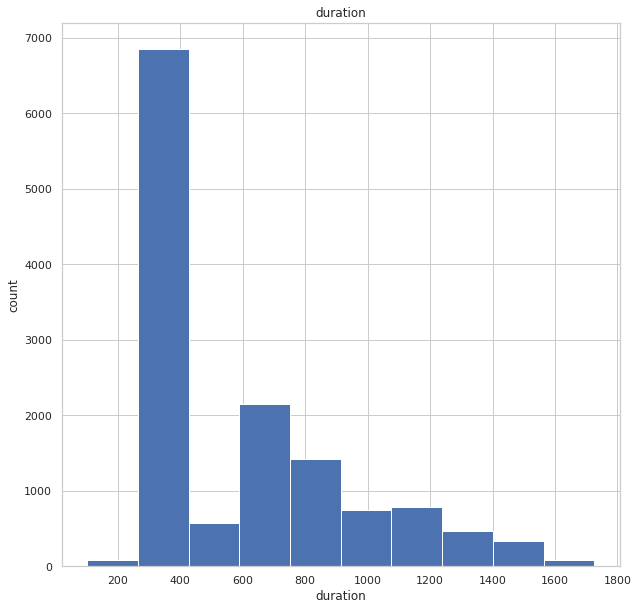

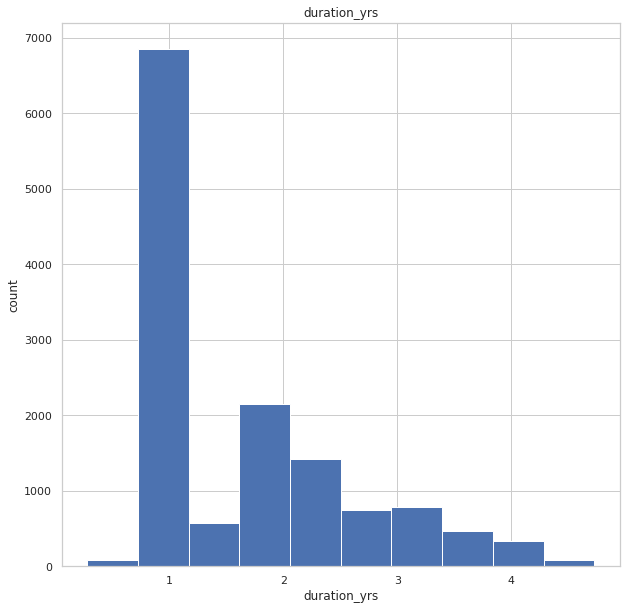

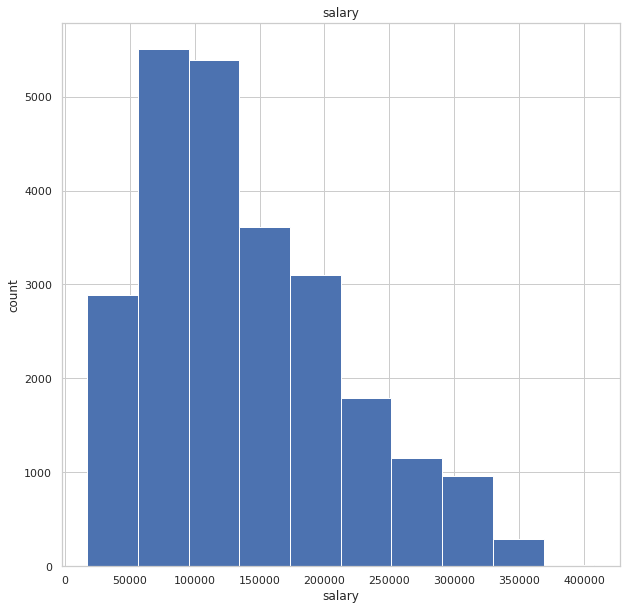

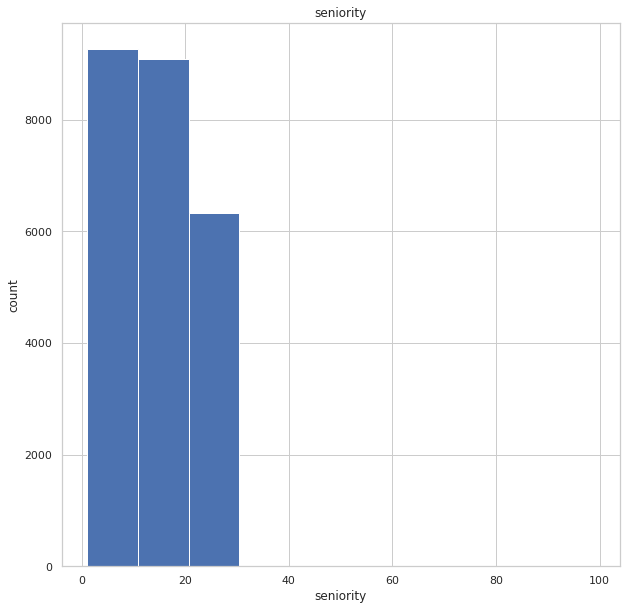

In [59]:
hist_list = ['duration', 'duration_yrs', 'salary', 'seniority']
for i in hist_list:
  plt.figure(figsize=(10,10))
  plt.title(str(i))
  plt.xlabel(str(i))
  plt.ylabel('count')
  plt.hist(i, data=df)
  plt.show()

### Churn vs Department

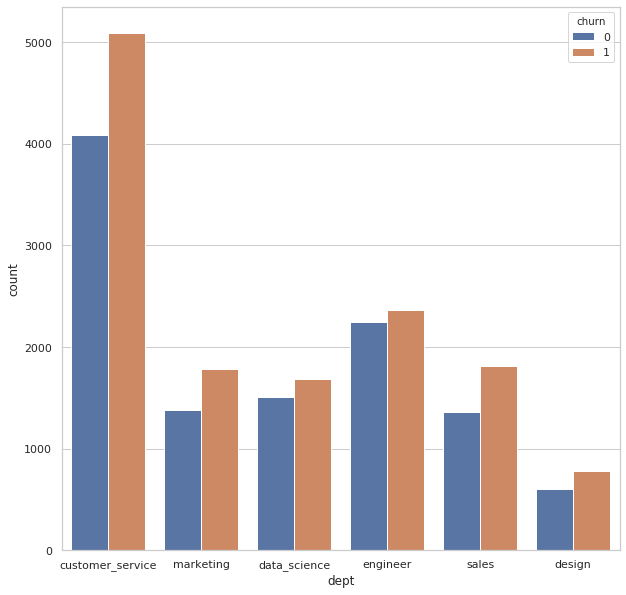

In [54]:
plt.figure(figsize=(10,10))
sns.set(style = 'whitegrid')
sns.countplot(df['dept'], hue=df['churn'])
plt.show()

In [0]:
churn_salary = df[df['churn']=='1']['salary']
stay_salary = df[df['churn']=='0']['salary']

In [97]:
churn_salary.mean()

135652.40562546262

In [98]:
stay_salary.mean()

141238.47390993568

In [0]:
from scipy import stats

In [96]:
stats.ttest_ind(churn_salary, stay_salary)

Ttest_indResult(statistic=-5.7498619463708875, pvalue=9.03687351296349e-09)

In [99]:
df.corr()

,employee_id,company_id,seniority,salary,duration,duration_yrs
employee_id,1.000000,-0.006225,-0.001976,0.002948,0.010128,0.010128
company_id,-0.006225,1.000000,-0.010026,-0.163892,-0.014176,-0.014176
seniority,-0.001976,-0.010026,1.000000,0.559465,0.002623,0.002623
salary,0.002948,-0.163892,0.559465,1.000000,0.078169,0.078169
duration,0.010128,-0.014176,0.002623,0.078169,1.000000,1.000000
duration_yrs,0.010128,-0.014176,0.002623,0.078169,1.000000,1.000000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 10 columns):
employee_id     24702 non-null float64
company_id      24702 non-null int64
dept            24702 non-null object
seniority       24702 non-null int64
salary          24702 non-null float64
join_date       24702 non-null datetime64[ns]
quit_date       13510 non-null datetime64[ns]
duration        13510 non-null float64
churn           24702 non-null object
duration_yrs    13510 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2), object(2)
memory usage: 1.9+ MB


In [113]:
df.isnull().sum()

employee_id         0
company_id          0
dept                0
seniority           0
salary              0
join_date           0
quit_date       11192
duration        11192
churn               0
duration_yrs    11192
dtype: int64

In [0]:
df['churn'] = df['churn'].astype(int)

## Build Model

In [0]:
df_dummies = pd.get_dummies(df.drop(columns=['employee_id','company_id','join_date', 'quit_date','duration_yrs','duration']))

In [0]:
y = df_dummies['churn']
X = df_dummies.drop(columns='churn')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [131]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_rfc_pred))
print(confusion_matrix(y_test, y_rfc_pred))
print(classification_report(y_test,y_rfc_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.5061
[[1454 1853]
 [1807 2297]]
              precision    recall  f1-score   support

           0       0.45      0.44      0.44      3307
           1       0.55      0.56      0.56      4104

    accuracy                           0.51      7411
   macro avg       0.50      0.50      0.50      7411
weighted avg       0.51      0.51      0.51      7411



In [135]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_clf_pred = clf.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_clf_pred))
print(confusion_matrix(y_test, y_clf_pred))
print(classification_report(y_test,y_clf_pred))

Accuracy: 0.5001
[[1735 1572]
 [2133 1971]]
              precision    recall  f1-score   support

           0       0.45      0.52      0.48      3307
           1       0.56      0.48      0.52      4104

    accuracy                           0.50      7411
   macro avg       0.50      0.50      0.50      7411
weighted avg       0.51      0.50      0.50      7411



In [136]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)
print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_pred))
print(confusion_matrix(y_test, y_lr_pred))
print(classification_report(y_test,y_lr_pred))

Accuracy: 0.5538
[[   0 3307]
 [   0 4104]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3307
           1       0.55      1.00      0.71      4104

    accuracy                           0.55      7411
   macro avg       0.28      0.50      0.36      7411
weighted avg       0.31      0.55      0.39      7411



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


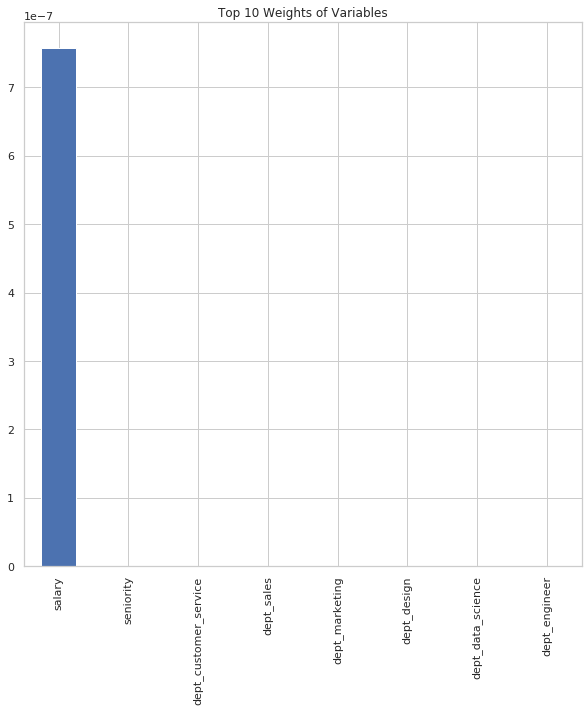

In [137]:
plt.figure(figsize=(10,10))
plt.title('Top 10 Weights of Variables')
weights = pd.Series(lr.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind='bar')

In [143]:
lr.coef_

array([[ 1.36644836e-10,  7.57033943e-07,  5.17412319e-12,
         1.75324089e-13,  9.40316458e-13, -4.34836303e-13,
         1.89484350e-12,  2.22719516e-12]])

In [144]:
X.columns.values

array(['seniority', 'salary', 'dept_customer_service',
       'dept_data_science', 'dept_design', 'dept_engineer',
       'dept_marketing', 'dept_sales'], dtype=object)